In [ ]:
# Superstore Sales Data Analysis

This project analyzes the Superstore sales dataset to identify
sales trends, profit performance, regional contribution, and the
impact of discounts on profitability using Python.

Tools used:
- Python
- Pandas
- Matplotlib
- Seaborn

In [1]:
#Import Libraries & Load Dataset
import pandas as pd
df=pd.read_csv("data/superstore.csv", encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.shape

(9994, 21)

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [5]:

df['Order date']=pd.to_datetime(df['Order Date'] , errors='coerce')
df['Ship Date']=pd.to_datetime(df['Ship Date'] ,errors='coerce')


In [6]:
df[['Order Date', 'Ship Date']].dtypes

Order Date            object
Ship Date     datetime64[ns]
dtype: object

In [7]:
df[['Order Date', 'Ship Date']].isnull().sum()

Order Date       0
Ship Date     6116
dtype: int64

In [8]:
df['Order Date'] = pd.to_datetime(
    df['Order Date'],
    dayfirst=True
)


In [9]:
df[['Order Date', 'Ship Date']].dtypes


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [10]:
df[['Order Date', 'Ship Date']].isnull().sum()


Order Date       0
Ship Date     6116
dtype: int64

In [11]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)


In [12]:
df[['Order Date', 'Ship Date']].dtypes


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [13]:
df[['Order Date', 'Ship Date']].isnull().sum()



Order Date       0
Ship Date     6116
dtype: int64

In [14]:
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Shipping Days'].describe()


count    3878.000000
mean      -30.049252
std       137.796751
min      -323.000000
25%      -141.000000
50%       -26.000000
75%        63.000000
max       330.000000
Name: Shipping Days, dtype: float64

In [15]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month


In [16]:
df[['Order Date', 'Order Year', 'Order Month']].head()

,Order Date,Order Year,Order Month
0,2013-11-09,2013,11
1,2013-11-09,2013,11
2,2013-06-13,2013,6
3,2012-10-11,2012,10
4,2012-10-11,2012,10


In [17]:
df[['Sales', 'Profit']].sum()

Sales     2.297201e+06
Profit    2.863970e+05
dtype: float64

<Axes: xlabel='Order Year,Order Month'>

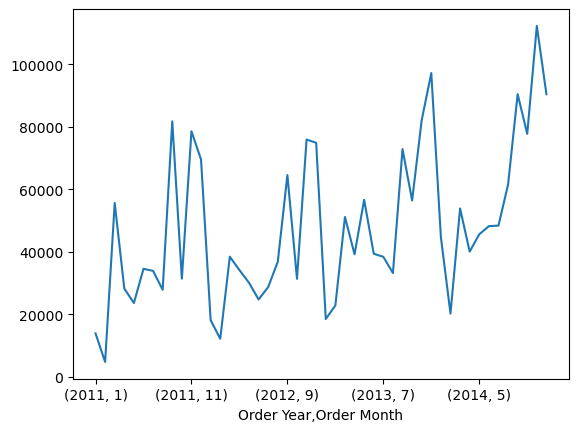

In [18]:
df.groupby(['Order Year', 'Order Month',])['Sales'].sum().plot(kind='line')

In [19]:
df['Margin']=df['Profit']/df['Sales']
df.groupby('Category')['Margin'].mean().sort_values()

Category
Furniture          0.038784
Office Supplies    0.138030
Technology         0.156138
Name: Margin, dtype: float64

In [20]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
df['Sales'].head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

In [23]:
df['Sales'].dtype

dtype('float64')

In [24]:
df.groupby('Order Year')['Sales'].sum()

Order Year
2011    484247.4981
2012    470532.5090
2013    608473.8300
2014    733947.0232
Name: Sales, dtype: float64

In [25]:
df.groupby('Order Month')['Sales'].sum()

Order Month
1      95365.9376
2      60172.6494
3     199252.9840
4     141851.5674
5     156122.2867
6     147082.6113
7     149580.8380
8     159589.4510
9     309770.0997
10    197115.2017
11    349120.0740
12    332177.1595
Name: Sales, dtype: float64

In [26]:
df.groupby('Category')['Profit'].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

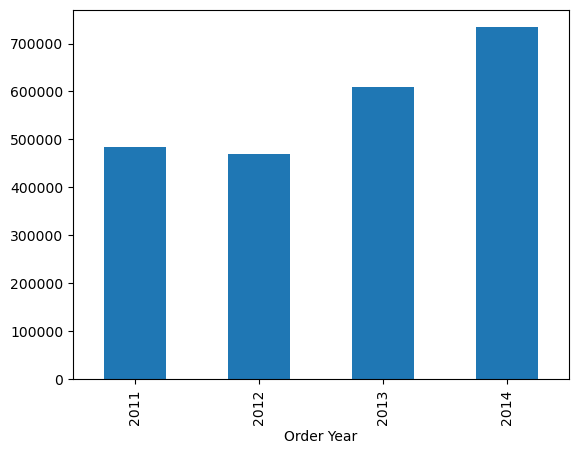

In [27]:
import matplotlib.pyplot as plt
df.groupby('Order Year')['Sales'].sum().plot(kind='bar')
plt.show()

In [28]:
yearly_sales=df.groupby('Order Year')['Sales'].sum()
yearly_sales

Order Year
2011    484247.4981
2012    470532.5090
2013    608473.8300
2014    733947.0232
Name: Sales, dtype: float64

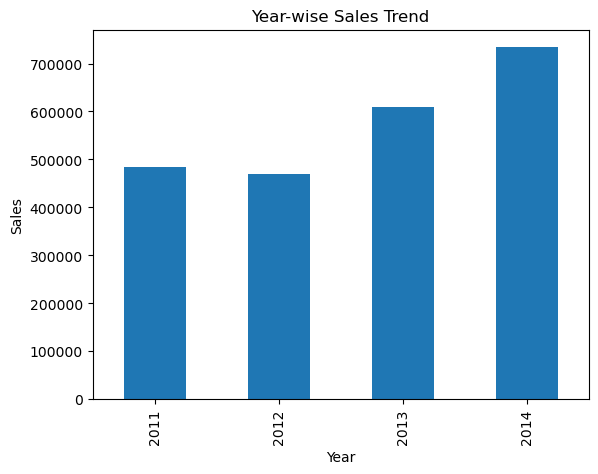

In [29]:
import matplotlib.pyplot as plt 
yearly_sales.plot(kind='bar')
plt.title("Year-wise Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [30]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Order date,Shipping Days,Order Year,Order Month,Margin
0,1,CA-2013-152156,2013-11-09,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013-09-11,32.0,2013,11,0.1600
1,2,CA-2013-152156,2013-11-09,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013-09-11,32.0,2013,11,0.3000
2,3,CA-2013-138688,2013-06-13,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaT,NaN,2013,6,0.4700
3,4,US-2012-108966,2012-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012-11-10,NaN,2012,10,-0.4000
4,5,US-2012-108966,2012-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012-11-10,NaN,2012,10,0.1125


In [31]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order date',
       'Shipping Days', 'Order Year', 'Order Month', 'Margin'],
      dtype='object')

In [32]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order Year']=df['Order date'].dt.year
df['Order Month']=df['Order date'].dt.month

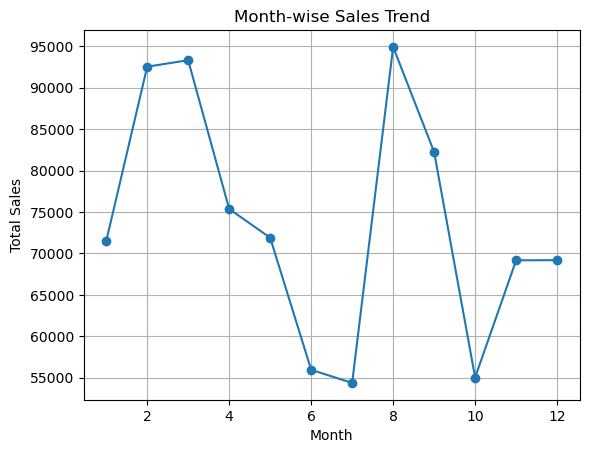

In [33]:
import matplotlib.pyplot as plt 
monthly_sales=df.groupby('Order Month')['Sales'].sum()

monthly_sales.plot(kind='line',marker='o')
plt.title("Month-wise Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

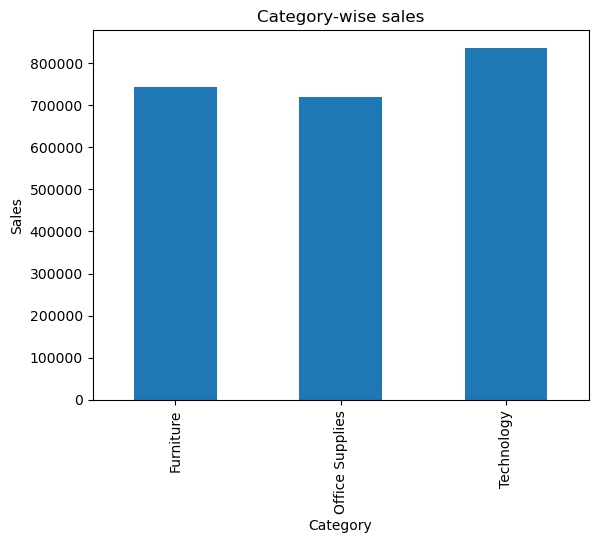

In [34]:
category_sales=df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar')
plt.title("Category-wise sales")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()


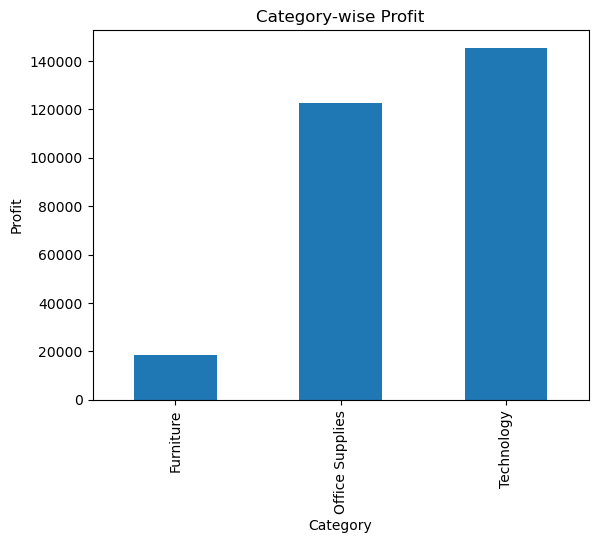

In [35]:
category_profit=df.groupby('Category')['Profit'].sum()
category_profit.plot(kind='bar')
plt.title("Category-wise Profit")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()


In [36]:
df['Profit Margin']=(df['Profit']/df['Sales']) *100

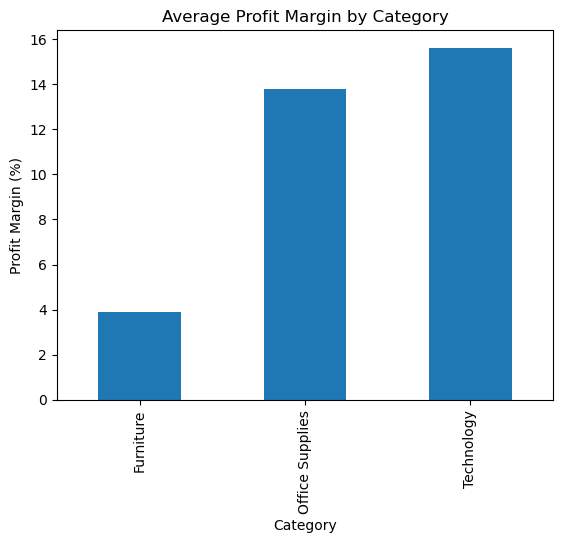

In [37]:
profit_margin_category=df.groupby('Category')['Profit Margin'].mean()
profit_margin_category.plot(kind='bar')
plt.title("Average Profit Margin by Category")
plt.ylabel("Profit Margin (%)")
plt.show()


In [ ]:
### Key Insights:
1. Sales show seasonal trends with peak months indicating higher demand.
2. Some categories generate high sales but low profit margins.
3. Categories with lower sales but higher profit margins are strategically important.
4. Profitability analysis helps optimize pricing and inventory decisions.


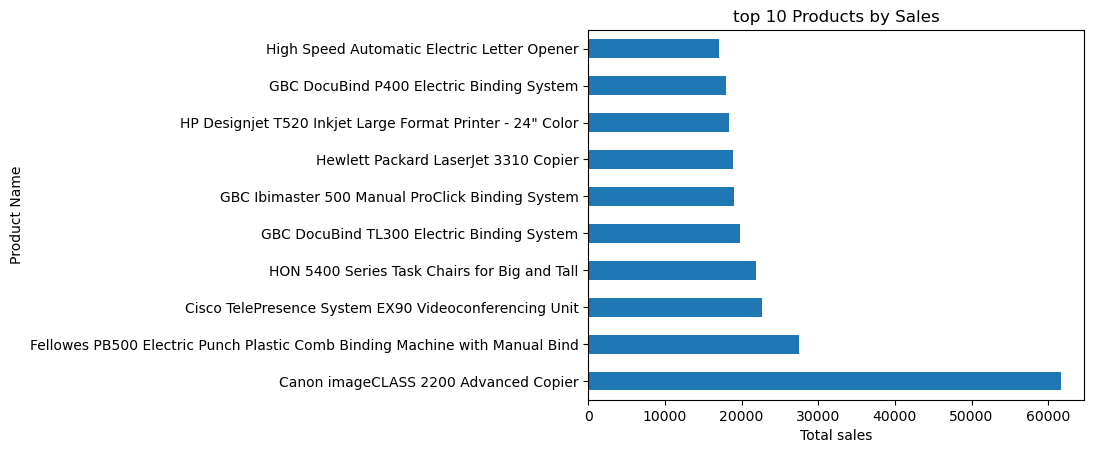

In [40]:
#Top 10 products by Sales
top_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh')
plt.title("top 10 Products by Sales")
plt.xlabel("Total sales")
plt.ylabel("Product Name")
plt.show()

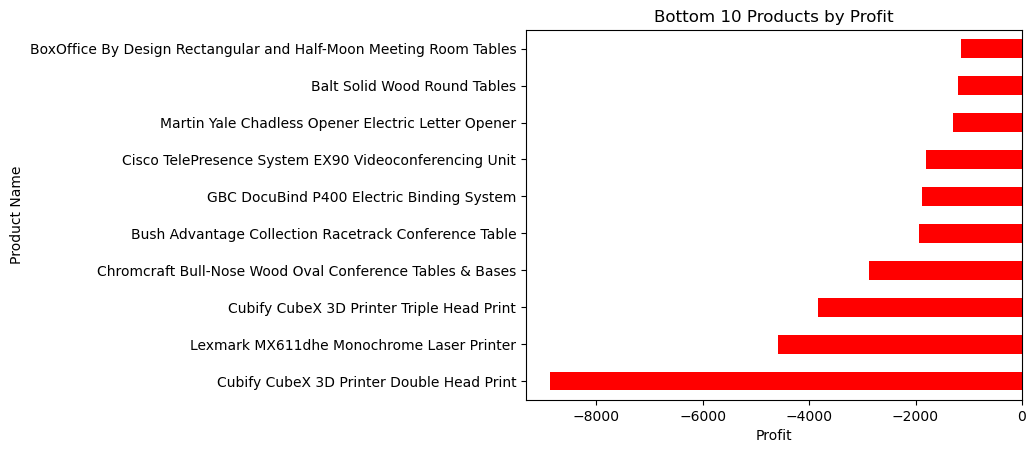

In [41]:
#Bottom 10 products by Sales
bottom_profit_products=df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
bottom_profit_products.plot(kind='barh', color='red')
plt.title("Bottom 10 Products by Profit")
plt.xlabel("Profit")
plt.ylabel("Product Name")
plt.show()


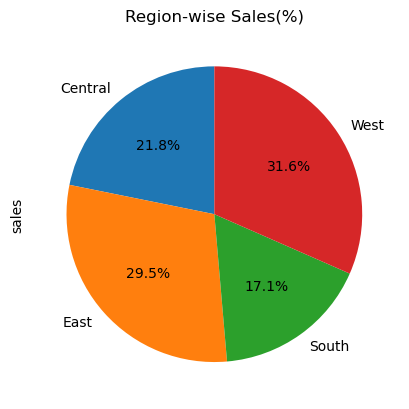

In [42]:
#Customer or Region Analysis
region_sales=df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.title("Region-wise Sales(%)")
plt.ylabel("sales")
plt.show()


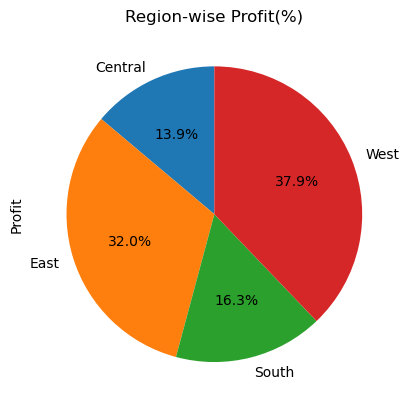

In [43]:
region_profit=df.groupby('Region')['Profit'].sum()
region_profit.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Region-wise Profit(%)")
plt.show()


In [ ]:
## Key Insights

1. The West region contributes the highest share of both sales and profit.
2. Sales and Profit show a moderate positive correlation (~0.48).
3. Higher discounts are associated with lower profits.
4. Technology category generates higher profit compared to Furniture.

## Business Recommendations

- Limit high discounts to protect profit margins.
- Focus on high-performing regions like West and East.
- Promote high-margin product categories.

In [44]:
#correlation analysis
df[['Sales','Profit', 'Discount']].corr()


,Sales,Profit,Discount
Sales,1.000000,0.479064,-0.028190
Profit,0.479064,1.000000,-0.219487
Discount,-0.028190,-0.219487,1.000000


In [ ]:
## Final Business Insights

1. Sales show clear seasonal trends across months.
2. Certain categories generate high revenue but lower profit margins.
3. Discounts negatively impact profitability.
4. Some products consistently produce losses and require re-evaluation.
5. Regional analysis highlights operational inefficiencies.

## Recommendations
- Optimize discounts to protect margins.
- Focus marketing on high-margin categories.
- Reprice or discontinue loss-making products.

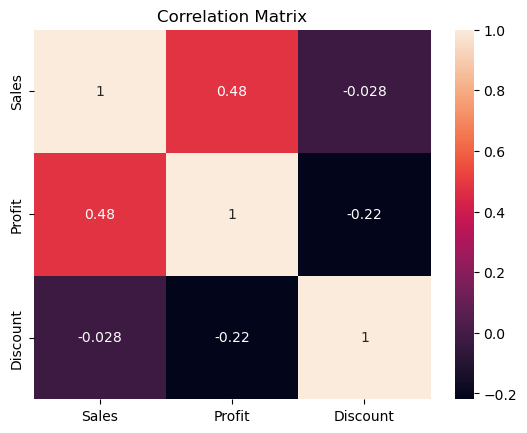

In [45]:
import seaborn as sns
sns.heatmap(df[['Sales', 'Profit','Discount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
## Correlation Analysis Insights

1. Sales and Profit show a moderate positive correlation (0.48),
   indicating higher sales generally lead to higher profit.

2. Discount has a negative correlation with Profit (-0.22),
   suggesting aggressive discounting reduces profitability.

3. Sales and Discount show minimal correlation,
   indicating discounts do not always drive higher sales.

### Business Recommendation:
- Optimize discount strategy to improve profit margins.
- Focus on increasing sales volume without heavy discounts.
    

In [46]:
df.to_csv("Superstore_Cleaned.csv",index=False)